<a href="https://colab.research.google.com/github/akash720/Facial-expression-recognition/blob/master/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading our model



In [0]:
from keras.models import load_model
model2 = load_model("my_model3.h5")

# Defining get_label() function

In [0]:
#Defining labels 

def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

# Detecting faces and cropping image to get face

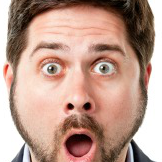

In [0]:
#Cropping image

from PIL import Image
import cv2
import matplotlib.pyplot as plt
from IPython.display import display

img = Image.open("surprise.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(np.asarray(img), 1.3, 5)
for (x, y, w, h) in faces:
  if len(faces) == 1: #Use simple check if one face is detected, or multiple (measurement error unless multiple persons on image)
        crop_img = img.crop((x,y,x+w,y+h))
  else:
        print("multiple faces detected, passing over image") 
display(crop_img)

#Resizing(acc. to model) and predicting results

In [0]:
#Resizing image to required size and processing
test_image = crop_img.resize((48,48),Image.ANTIALIAS)
test_image = np.array(test_image)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#scale pixels values to lie between 0 and 1 because we did same to our train and test set
gray = gray/255

#reshaping image (-1 is used to automatically fit an integer at it's place to match dimension of original image)
gray = gray.reshape(-1, 48, 48, 1)

res = model2.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res)

print("Probabilities are " + str(res[0])+"\n")
print("Emotion is "+get_label(result_num))

Probabilities are [5.97965591e-05 4.58202198e-10 6.04255088e-02 1.13449936e-07
 1.21668990e-07 9.39514458e-01 5.27196642e-09]

Emotion is Surprise


**Here the probabilities are as follows :**


* 5.97965591e-05 - Angry
* 4.58202198e-10 - Disgust
* 6.04255088e-02 - Fear
* 1.13449936e-07 - Happy
* 1.21668990e-07 - Sad
* 9.39514458e-01 - Surprise
* 5.27196642e-09 - Neutral

Since probability of being surprise is highest (0.93), emotion is **surprise** .

#Loading pre-trained model

*Here I'm using fer2013_mini_XCEPTION.110-0.65 model.*



In [0]:
pretrained_model = load_model("fer2013_mini_XCEPTION.110-0.65.hdf5")

#Prediction using pre-trained model

In [0]:
#Resizing image to required size
test_image = crop_img.resize((64,64),Image.ANTIALIAS)

#Converting image to array
test_image = np.array(test_image)

#converting to grayscale
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#scale pixels values to lie between 0 and 1 because we did same to our train and test set
gray = gray/255

#reshaping image (-1 is used to automatically fit an integer at it's place to match dimension of original image)
gray = gray.reshape(-1, 64, 64, 1)

res = pretrained_model.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res[0])

# print predictions
print("\nProbabilities are " + str(res[0])+"\n")
print("Emotion is "+ get_label(result_num))


Probabilities are [8.6809350e-03 5.2054395e-07 2.3409252e-01 5.6617814e-06 8.5717841e-04
 7.5634414e-01 1.9050653e-05]

Emotion is Surprise


**Here the probabilities are as follows :**


* 8.6809350e-03 - Angry
* 5.2054395e-07 - Disgust
* 2.3409252e-01 - Fear
* 5.6617814e-06 - Happy
* 8.5717841e-04 - Sad
* 7.5634414e-01 - Surprise
* 1.9050653e-05 - Neutral

Since probability of being surprise is highest (0.75), emotion is **surprise** .

***Our model is predicting better than this. Yay !***
